In [1]:
from sphere import Sphere,mat,index

In [2]:
import numpy as np
def J_z(d):
    j = (d-1)/2
    return np.diag([j-i for i in range(d)])
def r(m, j):
    return np.sqrt(j*(j+1)-m*(m+1))

def J_p(d):
    j = (d-1)/2
    return np.diag([r(j-1-i,j) for i in range(d-1)], k=1)
    
def J_m(d):
    return J_p(d).T

def J_x(d):
    return (J_p(d)+J_m(d))/2
def J_y(d):
    return (J_p(d)-J_m(d))/(2j)


In [3]:
J_z(3)
J_x(3)
J_y(3)

array([[ 0.+0.j        ,  0.-0.70710678j,  0.+0.j        ],
       [ 0.+0.70710678j,  0.+0.j        ,  0.-0.70710678j],
       [ 0.+0.j        ,  0.+0.70710678j,  0.+0.j        ]])

In [4]:
J_x(3)

array([[ 0.        ,  0.70710678,  0.        ],
       [ 0.70710678,  0.        ,  0.70710678],
       [ 0.        ,  0.70710678,  0.        ]])

In [5]:
J_y(3)

array([[ 0.+0.j        ,  0.-0.70710678j,  0.+0.j        ],
       [ 0.+0.70710678j,  0.+0.j        ,  0.-0.70710678j],
       [ 0.+0.j        ,  0.+0.70710678j,  0.+0.j        ]])

In [6]:
J_y(3)

array([[ 0.+0.j        ,  0.-0.70710678j,  0.+0.j        ],
       [ 0.+0.70710678j,  0.+0.j        ,  0.-0.70710678j],
       [ 0.+0.j        ,  0.+0.70710678j,  0.+0.j        ]])

In [7]:
def mat3(theta, phi,n=3):
    return np.sin(theta)*np.cos(phi)*J_x(n)+\
           np.sin(theta)*np.sin(phi)*J_y(n)+\
           np.cos(theta)*J_z(n)
            

In [8]:
import numpy as np

In [9]:
s = .4995
s = .5005
def mat2(theta, phi):
    return (1-s)*mat(0,0) + s*mat(theta, phi)

In [19]:
sphere = Sphere(delta_phi=.3,delta_theta=.3, mat = mat3,length=3)
sphere.chern_numbers()

[0, 0, 0]

In [20]:
sphere = Sphere(delta_phi=.05,delta_theta=.04, mat = mat3)
#sphere.chern_numbers()

In [21]:
print(sphere.verteces[0].calc(1),
sphere.verteces[3].calc(1),
sphere.verteces[30].calc(1),
sphere.verteces[7].calc(1),
sphere.verteces[100].calc(1))

(-1.33226762955e-15+0j) 0j 0j (-2.22044604925e-16+0j) (-1.11022302463e-16+0j)


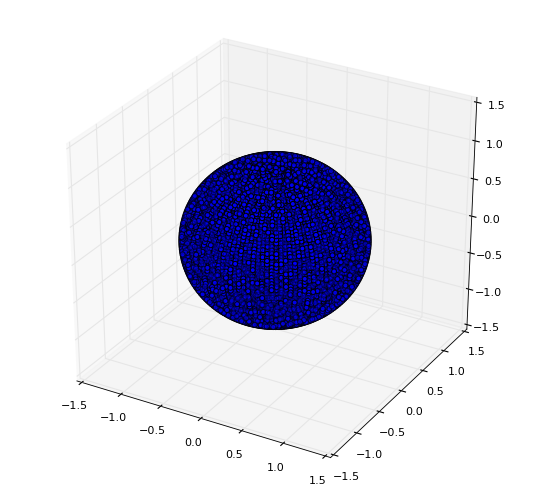

In [22]:
sphere.plot()

In [14]:
sphere[index(phi=41,theta = 13)]

<θ=0.52,φ=2.0500000000000003>

In [15]:
Lx = 1j*np.matrix([[0,0,0],[0,0,-1],[0,1,0]])
Ly = 1j*np.matrix([[0,0,1],[0,0,0],[-1,0,0]])
Lz = 1j*np.matrix([[0,-1,0],[1,0,0],[0,0,0]])

In [16]:
Lx

matrix([[ 0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.-1.j],
        [ 0.+0.j,  0.+1.j,  0.+0.j]])

In [17]:
def mat4(theta, phi):
    return np.sin(theta)*np.cos(phi)*Lx+\
           np.sin(theta)*np.sin(phi)*Ly+\
           np.cos(theta)*Lz

In [18]:
sphere = Sphere(delta_phi=.2,delta_theta=.2, mat = mat4, length = 3)
sphere.chern_numbers()

[-2, 0, 2]